# Image classification with MLP

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
%matplotlib notebook

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import random
from PIL import Image

import os

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.manifold import TSNE
import matplotlib.cm as cm

import pandas as pd
import seaborn as sns

import Mathematical_Morphology as morpho

In [2]:
import LettersNumbersClassification as LetNumClassif

[clf, X_train, X_test, y_train, y_test, dicClases] = LetNumClassif.train('../imgs/chars')

In [3]:
y_pred = clf.predict(X_test)

<IPython.core.display.Javascript object>


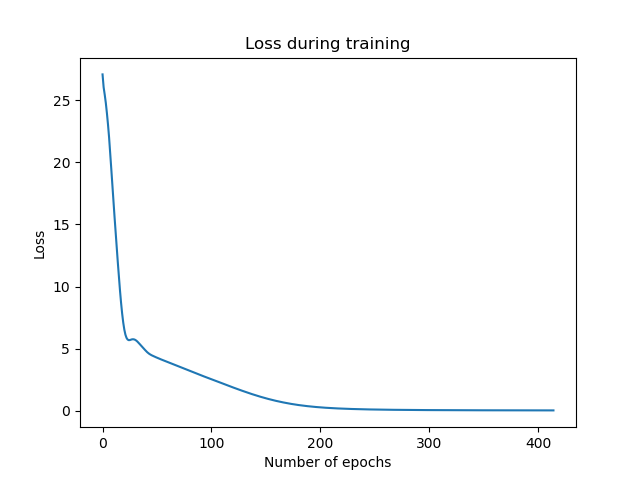

In [4]:
plt.figure()
plt.plot(clf.loss_curve_)
plt.title("Loss during training")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.show()

In [5]:
print(y_test.argmax(axis=1)[0:10])
print(y_pred.argmax(axis=1)[0:10])

[ 7 26 11 27  2 24 12  4 31 23]
[ 7 26  0  0  2  0  0  0 31 23]


<IPython.core.display.Javascript object>


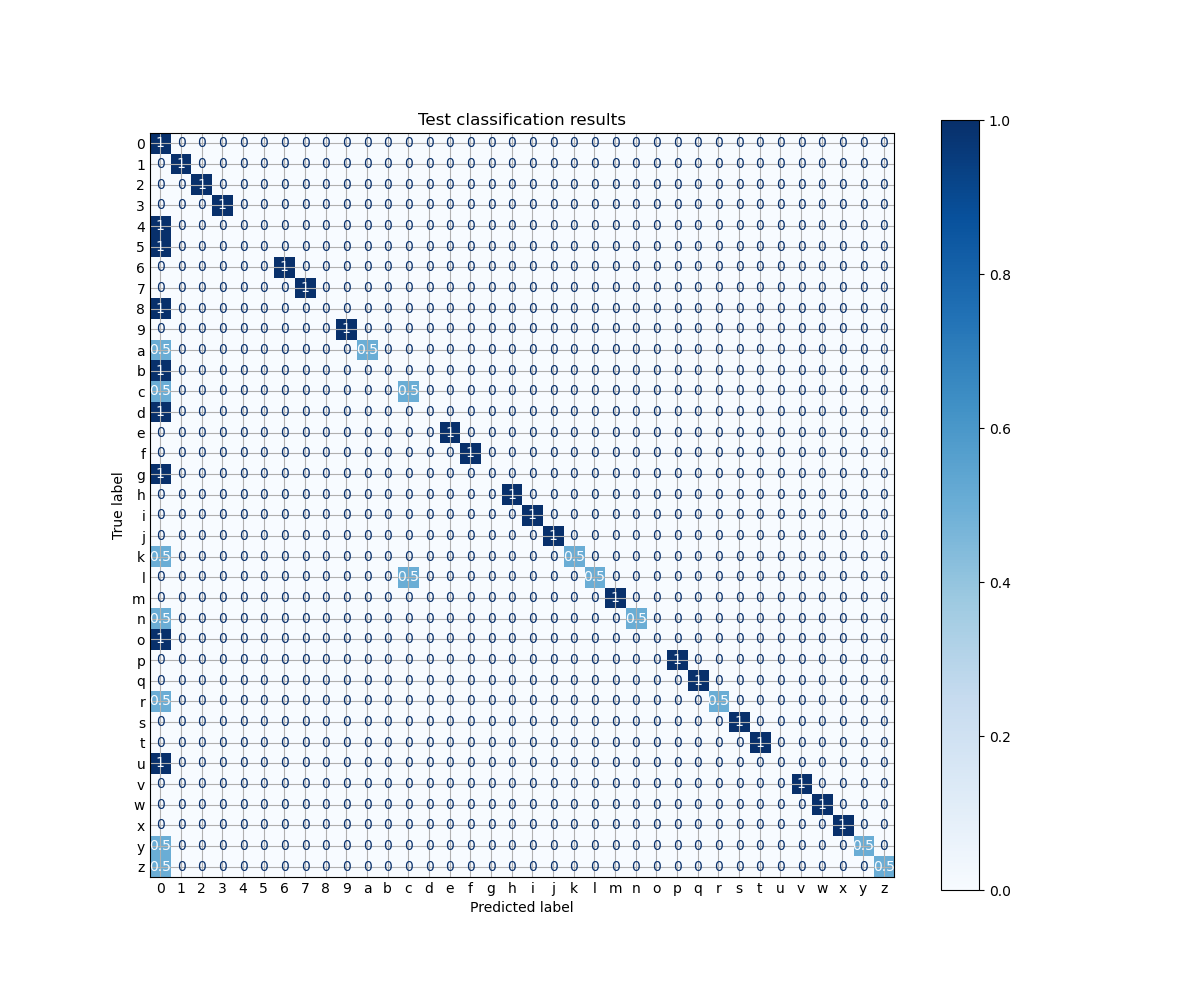

In [6]:
cmMT = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
cmd = ConfusionMatrixDisplay(cmMT, display_labels=list(dicClases.values()))

fig, ax = plt.subplots(figsize=(12,10))
cmd.plot(ax=ax, include_values=True, cmap='Blues', xticks_rotation='horizontal')

plt.title("Test classification results")
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.savefig('confusion_matrix.png', bbox_inches='tight')
plt.show()    

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro") 

print('Accuracy: ', round(accuracy, 4))
print('Precision: ', round(precision, 4))
print('Recall: ', round(recall, 4))

clases = list(dicClases.values())
ld = len(clases)
precision_class = precision_score(y_test, y_pred, average=None)[0:ld]
recall_class = recall_score(y_test, y_pred, average=None)[0:ld]

d = {'Class': clases, 'Precision': precision_class, 'Recall': recall_class}
df = pd.DataFrame(data=d)
print('\n\n')
print(df)

Accuracy:  0.58
Precision:  0.7027
Recall:  0.6351



   Class  Precision  Recall
0      0        0.0     0.0
1      1        1.0     1.0
2      2        1.0     1.0
3      3        1.0     1.0
4      4        0.0     0.0
5      5        0.0     0.0
6      6        1.0     1.0
7      7        1.0     1.0
8      8        0.0     0.0
9      9        1.0     1.0
10     a        1.0     0.5
11     b        0.0     0.0
12     c        0.5     0.5
13     d        0.0     0.0
14     e        1.0     1.0
15     f        1.0     1.0
16     g        0.0     0.0
17     h        1.0     1.0
18     i        1.0     1.0
19     j        1.0     1.0
20     k        1.0     0.5
21     l        1.0     1.0
22     m        1.0     1.0
23     n        1.0     0.5
24     o        0.0     0.0
25     p        1.0     1.0
26     q        1.0     1.0
27     r        1.0     0.5
28     s        1.0     1.0
29     t        1.0     1.0
30     u        0.0     0.0
31     v        1.0     1.0
32     w        1.0   

### Export the MLP model

In [8]:
from joblib import dump

In [9]:
dump(clf, 'MLP.joblib')

['MLP.joblib']